# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import pprint
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(str(cities[0:5]))

['belushya guba', 'vaini', 'punta alta', 'maridi', 'atuona']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
#url and query url config
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q="

#for loop to perform API calls for each city
weather_response = []
for city in cities:
    response = requests.get(query_url+city).json()
    weather_response.append(response)

weather_response

[{'cod': '404', 'message': 'city not found'},
 {'coord': {'lon': 74.49, 'lat': 15.34},
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02n'}],
  'base': 'stations',
  'main': {'temp': 296.64,
   'pressure': 964.11,
   'humidity': 57,
   'temp_min': 296.64,
   'temp_max': 296.64,
   'sea_level': 1029.28,
   'grnd_level': 964.11},
  'wind': {'speed': 1.31, 'deg': 16.5008},
  'clouds': {'all': 20},
  'dt': 1543086062,
  'sys': {'message': 0.0032,
   'country': 'IN',
   'sunrise': 1543021730,
   'sunset': 1543062527},
  'id': 1273574,
  'name': 'Vaini',
  'cod': 200},
 {'coord': {'lon': -55.82, 'lat': -27.46},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03d'}],
  'base': 'stations',
  'main': {'temp': 299.65,
   'pressure': 1010,
   'humidity': 61,
   'temp_min': 299.15,
   'temp_max': 300.15},
  'visibility': 10000,
  'wind': {'speed': 8.2, 'deg': 260},
  'clouds': {'all': 40},
  'dt': 15

In [66]:
#Data Retrieval
print('Beginning Data Retrieval')
print('----------------------------------')
goose = []
num = 0
for city in cities:
    if weather_response[num]['cod']==200:
        city_name = weather_response[num]['name']
        cloud_response = weather_response[num]['clouds']['all']
        country_response = weather_response[num]['sys']['country']
        date = weather_response[num]['dt']
        humidity = weather_response[num]['main']['humidity']
        lat = weather_response[num]['coord']['lat']
        lng = weather_response[num]['coord']['lon']
        max_temp = weather_response[num]['main']['temp_max']
        wind_speed = weather_response[num]['wind']['speed']
        print(f'City | {city_name}')
        goose.append({'City':city_name,
                      'Cloudiness':cloud_response,
                      'Country':country_response,
                      'Date':date,
                      'Humidity':humidity,
                      'Latitude':lat,
                      'Longitude':lng,
                      'Max Temp':max_temp,
                      'Wind Speed':wind_speed})
        num +=1
    elif weather_response[num]['cod']=='404':
        print(f'missing')
        goose.append({'City':'',
                      'Cloudiness':'',
                      'Country':'',
                      'Date':'',
                      'Humidity':'',
                      'Latitude':'',
                      'Longitude':'',
                      'Max Temp':'',
                      'Wind Speed':''})
        num+=1
        continue
    else:
        print('something went wrong in data retrieval')

    


Beginning Data Retrieval
----------------------------------
missing
City | Vaini
City | Punta Alta
missing
City | Atuona
City | Khatanga
City | Sheridan
City | Yellowknife
City | Raudeberg
City | Hermanus
City | Butaritari
City | Termez
City | Berdigestyakh
City | Hilo
City | Albany
City | Nikolskoye
City | Waiouru
City | Bredasdorp
City | Mataura
City | Rikitea
City | Ferme-Neuve
missing
City | Mount Isa
City | Ushuaia
City | Souillac
City | Hithadhoo
City | Port Lincoln
City | Barrow
City | Kapaa
City | Comodoro Rivadavia
City | Camabatela
City | Fenyi
City | East London
City | Kutum
missing
City | Punta Arenas
City | Benghazi
City | Saskylakh
City | Thompson
City | Plouzane
City | Isangel
City | La Ronge
missing
City | Corner Brook
City | Candido Mota
City | Corbelia
City | Cape Town
City | Hobart
City | Honiara
City | Avera
City | Busselton
City | Verkhoyansk
City | Gimli
City | Namatanai
City | Naivasha
City | Iracoubo
City | Lagoa
City | Narsaq
City | Port Elizabeth
City | Carque

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:
goose

[{'City': '',
  'Cloudiness': '',
  'Country': '',
  'Date': '',
  'Humidity': '',
  'Latitude': '',
  'Longitude': '',
  'Max Temp': '',
  'Wind Speed': ''},
 {'City': 'Vaini',
  'Cloudiness': 20,
  'Country': 'IN',
  'Date': 1543086062,
  'Humidity': 57,
  'Latitude': 15.34,
  'Longitude': 74.49,
  'Max Temp': 296.64,
  'Wind Speed': 1.31},
 {'City': 'Punta Alta',
  'Cloudiness': 40,
  'Country': 'AR',
  'Date': 1543082400,
  'Humidity': 61,
  'Latitude': -27.46,
  'Longitude': -55.82,
  'Max Temp': 300.15,
  'Wind Speed': 8.2},
 {'City': '',
  'Cloudiness': '',
  'Country': '',
  'Date': '',
  'Humidity': '',
  'Latitude': '',
  'Longitude': '',
  'Max Temp': '',
  'Wind Speed': ''},
 {'City': 'Atuona',
  'Cloudiness': 92,
  'Country': 'PF',
  'Date': 1543086063,
  'Humidity': 100,
  'Latitude': -9.8,
  'Longitude': -139.03,
  'Max Temp': 298.39,
  'Wind Speed': 4.46},
 {'City': 'Khatanga',
  'Cloudiness': 0,
  'Country': 'RU',
  'Date': 1543086063,
  'Humidity': 66,
  'Latitude': 7

In [92]:
goose_df = pd.DataFrame(goose)
goose_df.to_csv('Weather_City_Data.csv', index = False)

In [93]:
goose_df.replace('',np.nan,inplace=True)
goose_df.dropna(how='any',inplace=True)
goose_df.reset_index(inplace=True)
goose_df.head()

,index,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,1,Vaini,20.0,IN,1.543086e+09,57.0,15.34,74.49,296.64,1.31
1,2,Punta Alta,40.0,AR,1.543082e+09,61.0,-27.46,-55.82,300.15,8.20
2,4,Atuona,92.0,PF,1.543086e+09,100.0,-9.80,-139.03,298.39,4.46
3,5,Khatanga,0.0,RU,1.543086e+09,66.0,71.98,102.47,255.14,6.61
4,6,Sheridan,1.0,US,1.543085e+09,33.0,39.65,-105.03,288.15,4.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

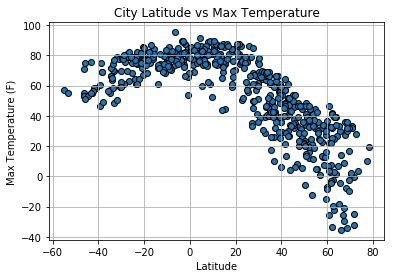

In [101]:
plt.scatter(goose_df['Latitude'],((goose_df['Max Temp']-273.15)*9/5)+32,linewidths=1,edgecolors='k')
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

#### Latitude vs. Humidity Plot

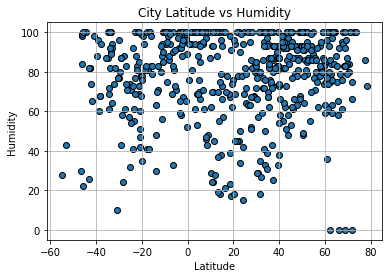

In [102]:
plt.scatter(goose_df['Latitude'],goose_df['Humidity'],linewidths=1,edgecolors='k')
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

#### Latitude vs. Cloudiness Plot

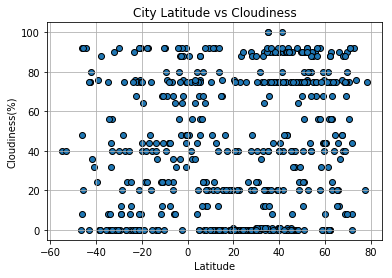

In [103]:
plt.scatter(goose_df['Latitude'],goose_df['Cloudiness'],linewidths=1,edgecolors='k')
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()

#### Latitude vs. Wind Speed Plot

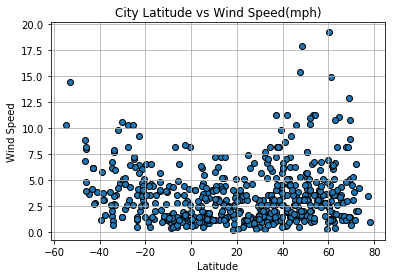

In [104]:
plt.scatter(goose_df['Latitude'],goose_df['Wind Speed'],linewidths=1,edgecolors='k')
plt.title('City Latitude vs Wind Speed(mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()